# Introduction:

### Dataset:

 I chose for analysis: TMDB movies This data set contains information about 10,000 movies collected from The Movie Database (TMDb).

# Questions:

1. What is the most popular genre for movie releases?

2. What are the months and years with the most movie releases?

3. Which Month has the Highest Average Revenue?

4. What movie made the most and least revenue?

5. Which movie has the highest and lowest budget?

6. Which Movies had the longest and the shortest runtime values?

7. Is Revenue Affected by Popularity, Vote Average, and Runtime?

In [1]:
#import all the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Magic words use to show plots within the document
%matplotlib inline

In [2]:
#Read the CSV File
df = pd.read_csv(r'/Users/reem/Downloads/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Data Wrangling and Cleaning:

In [3]:
#The summary of the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
#statistics summary of the dataset:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# check the number of (rows, columns):
df.shape

(10866, 21)

In [6]:
#drop some columns do not need.
df=df.drop(['cast', 'homepage', 'tagline', 'keywords', 'overview', 'imdb_id','budget_adj','revenue_adj','production_companies'], axis=1)

In [7]:
#the dataset contains null value
#to find out the null value:
df.isna().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [8]:
#dropping the null values
df.dropna(inplace=True)
df.isna().sum()


id                0
popularity        0
budget            0
revenue           0
original_title    0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [9]:
#check the duplicates 
sum(df.duplicated())

1

In [10]:
#drop duplicates rows:
df.drop_duplicates(inplace=True)

In [11]:
#release_date variable should be of the form datetime so will change format into Datetime Format
df['release_date'] = pd.to_datetime(df['release_date'])

In [12]:
#There are 0 values in columns budget and revenue so replace 0 values with the mean in both columns.
df['budget'] = df['budget'].replace(0,df['budget'].mean())

df['revenue'] = df['revenue'].replace(0,df['revenue'].mean())

In [13]:
#there are 0 values in columns runtime 
df.query('runtime == 0').count()

id                28
popularity        28
budget            28
revenue           28
original_title    28
director          28
runtime           28
genres            28
release_date      28
vote_count        28
vote_average      28
release_year      28
dtype: int64

In [14]:
#remove 0 from runtime
df =df[df['runtime'] !=0]

In [15]:
# add new column [profit]
df['profit'] = df['revenue'] - df['budget']

# Exploratory Data Analysis:

### Question1: What is the most popular genre for movie releases?

In [16]:
#first thing I will get total of the genres
genres_count = pd.Series(df['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)


#Show the genres count
genres_count

Drama              4746
Comedy             3772
Thriller           2902
Action             2376
Romance            1703
Horror             1628
Adventure          1465
Crime              1352
Science Fiction    1222
Family             1221
Fantasy             911
Mystery             807
Animation           692
Documentary         506
Music               397
History             332
War                 270
Foreign             184
Western             164
TV Movie            159
dtype: int64

Text(0, 0.5, 'Number Of Movies')

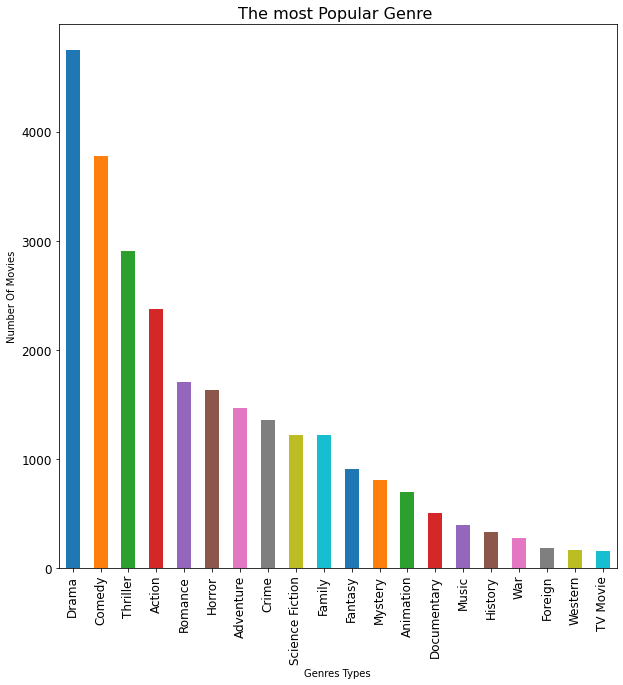

In [17]:
#Then plot a 'bar' plot using plot function for 'genre types vs number of movies'.
cmap = plt.cm.tab10
colors = cmap(np.arange(len(df)) % cmap.N)
genres_count.plot(kind= 'bar',figsize = (10,10),fontsize=12,color=colors)
#setup the title and the labels of the plot.
plt.title("The most Popular Genre ",fontsize=16)
plt.xlabel('Genres Types',fontsize=10)
plt.ylabel("Number Of Movies",fontsize= 10)

###### Drama (4746) and Comedy (3772) appear to be the most popular genres, then Thrillers (2902).

### Question2: What are the months and years with the most movie releases?

Text(0, 0.5, 'Number Of Movies')

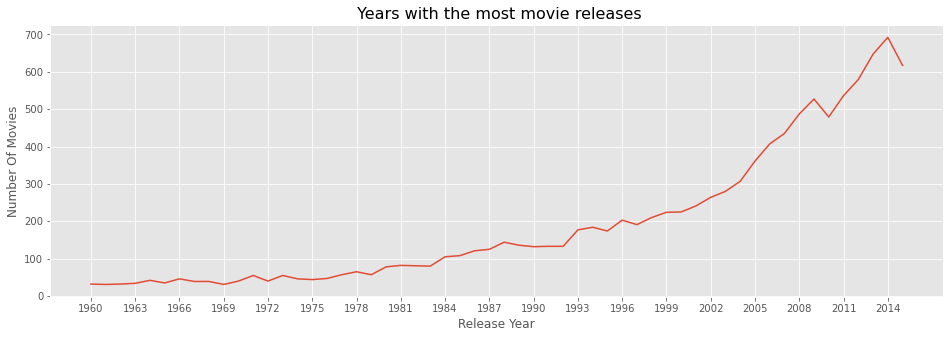

In [18]:
#First will count the highset of years
#The number of movies each year 
plt.style.use("ggplot")
movies_year=df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2015,3),figsize=(16,5))
plt.title(' Years with the most movie releases',fontsize=16)
plt.xlabel('Release Year',fontsize=12)
plt.ylabel('Number Of Movies',fontsize=12)

##### According to the plot, the year 2014 had the most releases.

Text(0, 0.5, 'Number of movie releases')

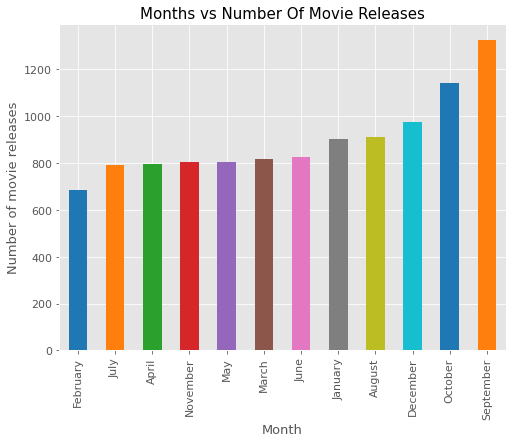

In [19]:
## To see which months with the most movie releases
#extract the month number from the release date.
df['month'] = df['release_date'].dt.month_name()

#compute months and plot the bar graph.
cmap = plt.cm.tab10
colors = cmap(np.arange(len(df)) % cmap.N)
movies_month=df.groupby('month').count()['id'].sort_values().plot(kind='bar',fontsize = 11,figsize=(8,6),color=colors)

#set up the labels and titles of the plot.
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)

##### As the plot shows, September and October have the highest number of releases.

# Question3: Which Month has the Highest Average Revenue?

In [20]:
# Create a DataFrame
df1= pd.DataFrame(df, columns=["month", "revenue"])

#calculate the mean revenue of each month.
mean_revenue  = df1.groupby('month').mean()

Text(0, 0.5, 'Average Revenue')

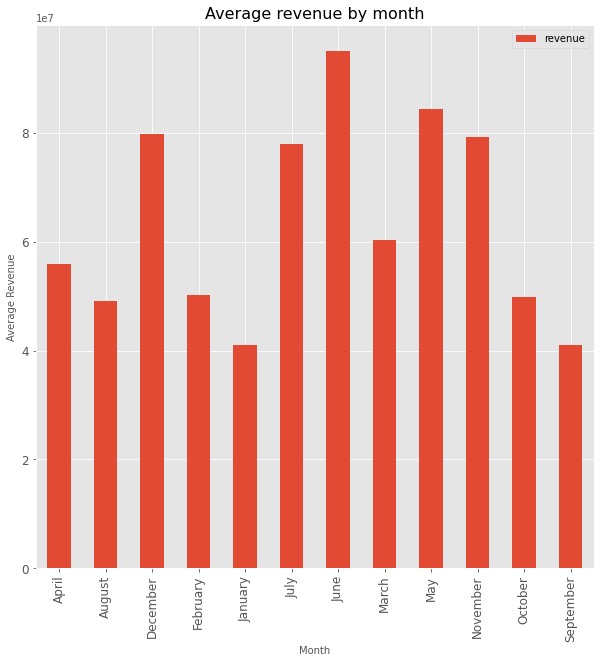

In [21]:
#make the bar plot
plt.style.use("ggplot")
mean_revenue.plot(kind= 'bar',figsize = (10,10),fontsize=12)
#set up the title and lables of the plot.
plt.title('Average revenue by month',fontsize = 16)
plt.xlabel('Month',fontsize = 10)
plt.ylabel('Average Revenue',fontsize = 10)

##### According to the plot, the month with the highest average revenue is June and May.

# Question4: What movie made the most and least revenue?

In [22]:
# The highest revenue:
df.nlargest(5, ['revenue'])

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit,month
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009,2.544506e+09,December
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.868178e+09,December
5231,597,4.355219,200000000.0,1.845034e+09,Titanic,James Cameron,194,Drama|Romance|Thriller,1997-11-18,4654,7.3,1997,1.645034e+09,November
4361,24428,7.637767,220000000.0,1.519558e+09,The Avengers,Joss Whedon,143,Science Fiction|Action|Adventure,2012-04-25,8903,7.3,2012,1.299558e+09,April
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.363529e+09,June


Text(0, 0.5, 'Title')

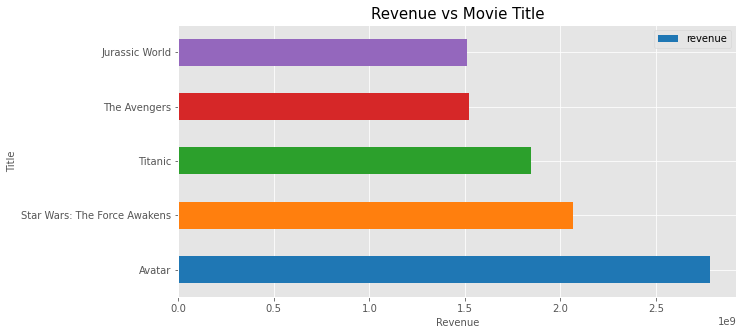

In [23]:
#plot to see the highest revenue 
cmap = plt.cm.tab10
colors = cmap(np.arange(len(df)) % cmap.N)
df.nlargest(5, 'revenue').plot.barh(y='revenue',x='original_title',color=colors, figsize=(10,5));
plt.title("Revenue vs Movie Title",fontsize = 15)
plt.xlabel('Revenue',fontsize = 10)
plt.ylabel('Title',fontsize = 10)

In [24]:
#The smallest revenue:
df.nsmallest(5, ['revenue'])

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit,month
5067,13537,0.462609,6.000000e+06,2.0,Shattered Glass,Billy Ray,94,Drama|History,2003-11-14,46,6.4,2003,-5.999998e+06,November
8142,2293,0.552091,6.000000e+06,2.0,Mallrats,Kevin Smith,94,Romance|Comedy,1995-10-20,201,6.8,1995,-5.999998e+06,October
1380,18196,0.097126,1.471114e+07,3.0,The Sentinel,Michael Winner,92,Horror|Drama|Mystery,1977-01-07,14,6.3,1977,-1.471113e+07,January
3239,14301,0.352054,2.000000e+05,3.0,Dr. Horrible's Sing-Along Blog,Joss Whedon,42,Adventure|Action|Comedy|Science Fiction|Music,2008-07-15,140,7.7,2008,-1.999970e+05,July
10607,12101,0.621476,1.471114e+07,3.0,Soylent Green,Richard Fleischer,97,Mystery|Science Fiction|Thriller,1973-04-19,124,6.6,1973,-1.471113e+07,April


Text(0, 0.5, 'Title')

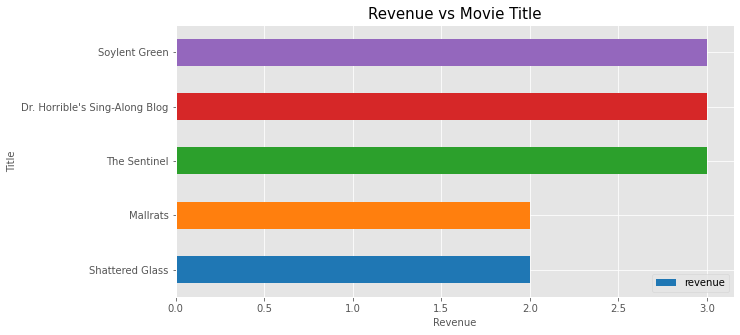

In [25]:
#plot to see the lowest revenue 
cmap = plt.cm.tab10
colors = cmap(np.arange(len(df)) % cmap.N)
df.nsmallest(5, 'revenue').plot.barh(y='revenue',x='original_title',color=colors, figsize=(10,5));
plt.title("Revenue vs Movie Title",fontsize = 15)
plt.xlabel('Revenue',fontsize = 10)
plt.ylabel('Title',fontsize = 10)

##### The largest revenue earned of Avatar movie is shown in column 1386, 2.781506e+09 dollars.
##### While the smallest revenue earned of Shattered Glass and  Mallrats moviea are shown in column 5067 and 8142 , 2 dollars

# Question5: Which movie has the highest and lowest budget?

In [26]:
#The largest budget:
df.nlargest(5, ['budget'])

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit,month
2244,46528,0.250540,425000000.0,1.108757e+07,The Warrior's Way,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,74,6.4,2010,-4.139124e+08,December
3375,1865,4.955130,380000000.0,1.021683e+09,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,136,Adventure|Action|Fantasy,2011-05-11,3180,6.3,2011,6.416830e+08,May
7387,285,4.965391,300000000.0,9.610000e+08,Pirates of the Caribbean: At World's End,Gore Verbinski,169,Adventure|Fantasy|Action,2007-05-19,2626,6.8,2007,6.610000e+08,May
14,99861,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,Joss Whedon,141,Action|Adventure|Science Fiction,2015-04-22,4304,7.4,2015,1.125036e+09,April
6570,1452,1.957331,270000000.0,3.910812e+08,Superman Returns,Bryan Singer,154,Adventure|Fantasy|Action|Science Fiction,2006-06-28,834,5.3,2006,1.210812e+08,June


Text(0, 0.5, 'Title')

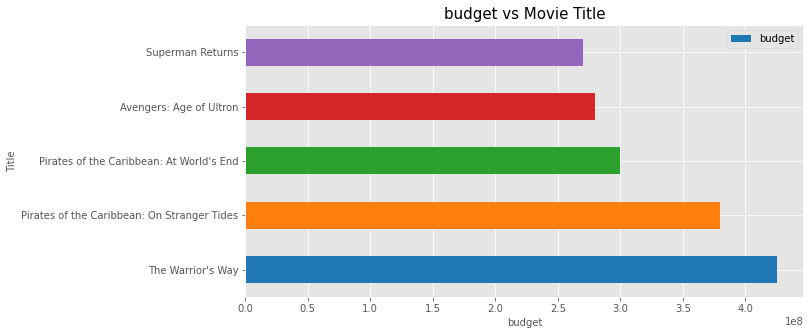

In [27]:
#plot to see the highest budget 
cmap = plt.cm.tab10
colors = cmap(np.arange(len(df)) % cmap.N)
df.nlargest(5, 'budget').plot.barh(y='budget',x='original_title',color=colors, figsize=(10,5));
plt.title("budget vs Movie Title",fontsize = 15)
plt.xlabel('budget',fontsize = 10)
plt.ylabel('Title',fontsize = 10)

In [28]:
#The smallest budget:
df.nsmallest(5, ['budget'])

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit,month
1151,287524,0.177102,1.0,4.006558e+07,Fear Clinic,Robert Hall,95,Horror,2014-10-31,15,4.1,2014,4.006558e+07,October
2618,39964,0.090186,1.0,1.000000e+02,Lost & Found,Jeff Pollack,95,Comedy|Romance,1999-04-23,14,4.8,1999,9.900000e+01,April
3065,12689,0.472691,1.0,4.006558e+07,"Angus, Thongs and Perfect Snogging",Gurinder Chadha,100,Comedy|Drama|Family|Romance,2008-07-25,146,6.5,2008,4.006558e+07,July
3581,59296,0.520430,1.0,1.378000e+03,"Love, Wedding, Marriage",Dermot Mulroney,90,Comedy|Romance,2011-06-03,55,5.3,2011,1.377000e+03,June
8944,14373,0.464188,2.0,1.600000e+01,Death Wish 2,Michael Winner,88,Action|Crime|Thriller,1982-02-20,27,5.6,1982,1.400000e+01,February


Text(0, 0.5, 'Title')

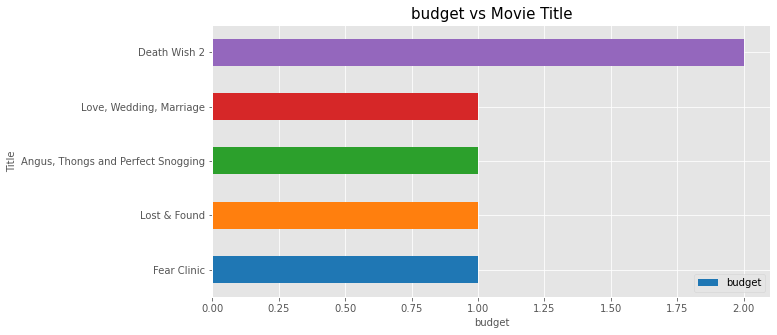

In [29]:
#plot to see the lowest budget 
cmap = plt.cm.tab10
colors = cmap(np.arange(len(df)) % cmap.N)
df.nsmallest(5, 'budget').plot.barh(y='budget',x='original_title',color=colors, figsize=(10,5));
plt.title("budget vs Movie Title",fontsize = 15)
plt.xlabel('budget',fontsize = 10)
plt.ylabel('Title',fontsize = 10)

#### The largest budget of The Warrior's Wayis movie is 425000000 dollars and shown in column 2244.
#### Whereas the smalest budget of movie Fear Clinic, Lost & Found, Angus, Thongs and Perfect Snogging and Love, Wedding, Marriage  are 1 dollars and shown in column 1151, 2618, 3065 and 3581.

# Question6: Which Movies had longest and shortest runtime values?

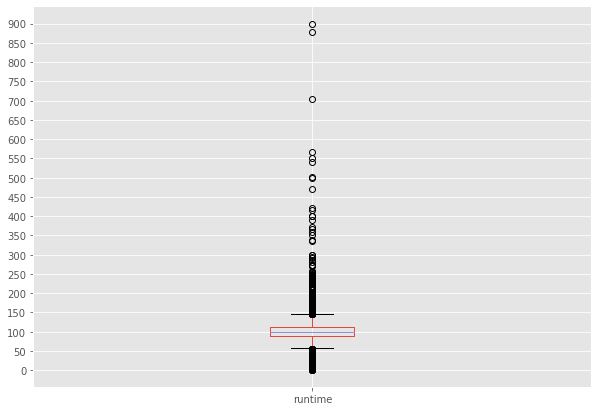

In [31]:
##First plot box plot of the runtime to see the summary of statistics (first quartile, median and third quartile):
df["runtime"].plot(figsize=(10,7),kind='box',yticks = np.arange(0,950,50));

##### A box plot demonstrates how spreaded the distribution will be throughout the movie's runtime.
##### Based on the plot, I can conclude that:
##### 25% of movies have a runtime less than 90 minutes
##### 50% of movies have a runtime less than 100 minutes. (median)
##### 75% of movies have a runtime  less than 119 minutes

In [32]:
#find the highest runtime:
df.nlargest(5, ['runtime'])

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit,month
3894,125336,0.006925,1.471114e+07,4.006558e+07,The Story of Film: An Odyssey,Mark Cousins,900,Documentary,2011-09-03,14,9.2,2011,2.535444e+07,September
4041,150004,0.469332,1.471114e+07,4.006558e+07,Taken,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...,877,Science Fiction,2002-12-02,38,6.8,2002,2.535444e+07,December
2722,331214,0.537593,1.471114e+07,1.250000e+08,Band of Brothers,Phil Alden Robinson|Richard Loncraine|Mikael S...,705,Action|Drama|War,2001-09-09,313,8.0,2001,1.102889e+08,September
6176,42044,0.147489,1.471114e+07,4.006558e+07,Shoah,Claude Lanzmann,566,Documentary,1985-11-01,16,8.3,1985,2.535444e+07,November
6894,192040,0.137913,1.471114e+07,4.006558e+07,Planet Earth,Alastair Fothergill,550,Documentary,2006-12-10,65,7.6,2006,2.535444e+07,December


In [33]:
#find the lowest runtime
df.nsmallest(5, ['runtime'])

,id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit,month
4883,142563,0.078472,1.471114e+07,4.006558e+07,Fresh Guacamole,PES,2,Animation,2012-03-02,29,7.9,2012,2.535444e+07,March
7905,13924,0.647261,1.471114e+07,4.006558e+07,The Adventures of AndrÃ© and Wally B.,Alvy Ray Smith,2,Animation,1984-12-17,32,5.3,1984,2.535444e+07,December
10550,13925,0.306425,1.471114e+07,4.006558e+07,Luxo Jr.,John Lasseter,2,Animation|Family,1986-08-17,81,7.3,1986,2.535444e+07,August
10754,3171,0.002757,1.471114e+07,4.006558e+07,Bambi Meets Godzilla,Marv Newland,2,Animation|Comedy,2069-01-01,12,5.6,1969,2.535444e+07,January
1112,264170,0.202776,1.471114e+07,4.006558e+07,Batman: Strange Days,Bruce Timm,3,Action|Animation,2014-04-09,20,7.6,2014,2.535444e+07,April


##### The largest runtime is shown in column 3894 by 900 minutes.
##### Whereas the smallest runtime is shown in column 4883, 7905, 10550 and 10754 by 2 minutes.

# Question7: Is Revenue Affected by Popularity, Vote Average, and Runtime?

In [34]:
#first find corolation between Revenue and popularity:

df['revenue'].corr(df['popularity'])

0.6350971965285701

In [35]:
#make function for a scatter plot:
def show_corolation (column_name):
    x=df['revenue']
    y= df[column_name]
    plt.scatter(x, y,c='tab:blue') 
    plt.title('Revenue VS {}'.format(column_name))
    plt.xlabel('revenue')
    plt.ylabel(column_name)
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='k')
    plt.show()

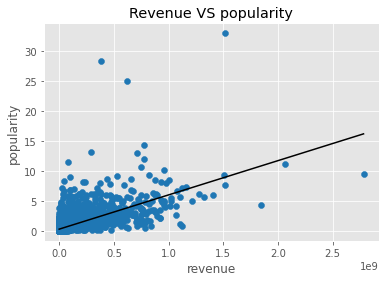

In [36]:
show_corolation('popularity')

In [37]:
#second find corolation between Revenue and Average vote:
df['revenue'].corr(df['vote_average'])

0.15353610013006927

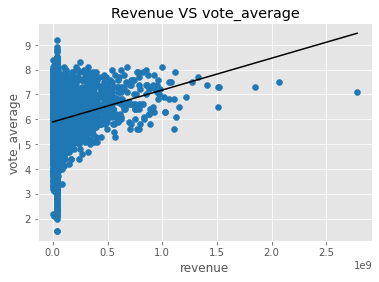

In [38]:
##plot a scatter plot:
show_corolation('vote_average')

In [39]:
#Third find corolation between Revenue and Runtime
df['revenue'].corr(df['runtime'])

0.14423586522555767

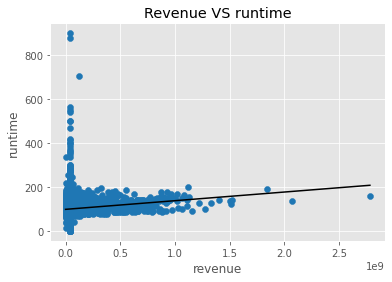

In [40]:
#plot a scatter plot:
show_corolation('runtime')

# Conclusions:

1. Drama (4746) and Comedy (3772) appear to be the most popular genres, then came Thrillers (2902).
2. Maximum Number Of Movies Release in the year 2014. While September and October have the highest months of releases.
3. For earning more profit, June, May, September and December are the best months to release movies.
4. The largest revenue comes from Avatar movie while the lowest revenue earned from Shattered Glass and Mallrats movies.
5. The movie with the highest budget is The Warrior's Way while the movie with the lowest budget Fear Clinic, Lost & Found, Angus, Thongs and Perfect Snogging and Love, Wedding, Marriage
6. The largest movie runtime is  900 minutes Whereas the smallest movie runtime is 2 minutes.
7. 
* The revenue is increasing with popularity. I can say that popularity is highly correlated with revenue by Correlation = 0.6350.
* The correlation between revenue and the vote average is 0.1535. Therefore, vote average is not highly correlated with revenue.
* The correlation between revenue and the runtime is 0.1442. Therefore, runtime is not highly correlated with revenue.


# Limitations:

* There are no currency units in the budget and revenue columns, so it is possible that budgets are in different currencies depending on where a film was produced.
* Due to some zeros on budget and revenue, I had to substitute with averages which may affect the analysis.
* Although some columns have missing values, I did not need them in my analysis, so I dropped them.
* The number of votes for each movie was different. So, movies with fewer votes or higher votes wouldn't be accurate.